<a href="https://colab.research.google.com/github/nidamaulida/regresilogistik---nida/blob/main/RegresiLogistik.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import warnings
#ploting libraries
import matplotlib.pyplot as plt
import seaborn as sns
#relevant ML libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
#Machine learning Model
from sklearn.linear_model import LogisticRegression

In [ ]:
tr_df = pd.read_csv('Train.csv')
te_df = pd.read_csv('Test.csv')


In [ ]:
tr_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [ ]:
te_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [ ]:
tr_df.shape

(614, 13)

In [ ]:
te_df.shape

(367, 12)

In [ ]:
te_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [ ]:
tr_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
te_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [ ]:
tr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
#the Id column is not needed, let's drop it for both test and
tr_df.drop('Loan_ID', axis=1, inplace=True)
te_df.drop('Loan_ID', axis=1, inplace=True)

# Checking the new shapes
print(f"Training set (row, col): {tr_df.shape}\nTesting set (row, col): {te_df.shape}")


Training set (row, col): (614, 12)
Testing set (row, col): (367, 11)


In [ ]:
tr_df.isnull().sum().sort_values(ascending=False)

,0
Credit_History,50
Self_Employed,32
LoanAmount,22
Dependents,15
Loan_Amount_Term,14
Gender,13
Married,3
Education,0
CoapplicantIncome,0
ApplicantIncome,0


In [ ]:
print("Before filling missing values\n\n", "#" * 50, "\n")

null_cols = [
    'Credit_History', 'Self_Employed', 'LoanAmount',
    'Dependents', 'Loan_Amount_Term', 'Gender', 'Married'
]

# Menampilkan value counts sebelum imputasi
for col in null_cols:
    print(f"{col}:\n{tr_df[col].value_counts()}\n", "-" * 50)

# Mengisi nilai kosong dengan modus dari masing-masing kolom
for col in null_cols:
    tr_df[col] = tr_df[col].fillna(tr_df[col].dropna().mode().values[0])

# Menampilkan hasil setelah imputasi
print("After filling missing values\n\n", "#" * 50, "\n")
for col in null_cols:
    print(f"\n{col}:\n{tr_df[col].value_counts()}\n", "-" * 50)


Before filling missing values

 ################################################## 

Credit_History:
Credit_History
1.0    475
0.0     89
Name: count, dtype: int64
 --------------------------------------------------
Self_Employed:
Self_Employed
No     500
Yes     82
Name: count, dtype: int64
 --------------------------------------------------
LoanAmount:
LoanAmount
120.0    20
110.0    17
100.0    15
187.0    12
160.0    12
         ..
292.0     1
142.0     1
350.0     1
496.0     1
253.0     1
Name: count, Length: 203, dtype: int64
 --------------------------------------------------
Dependents:
Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64
 --------------------------------------------------
Loan_Amount_Term:
Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64
 --------------------------------------------------
Gender:
Gender
Male      

In [ ]:
# List of all numeric columns
num = tr_df.select_dtypes('number').columns.to_list()

# List of all categorical columns
cat = tr_df.select_dtypes('object').columns.to_list()

# DataFrame for numeric columns
loan_num = tr_df[num]

# DataFrame for categorical columns
loan_cat = tr_df[cat]


<ipython-input-20-5131ec7678c7>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=tr_df, x=col_name, palette="pastel")


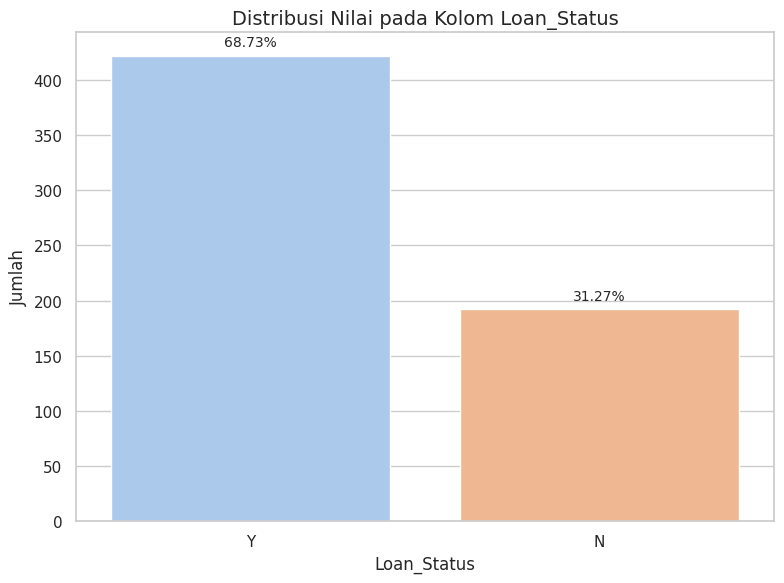

In [ ]:
col_name = cat[-1]
total = float(len(tr_df[col_name]))

plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")
ax = sns.countplot(data=tr_df, x=col_name, palette="pastel")

# Menambahkan persentase di atas setiap batang
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2.,
        height + total * 0.01,
        '{:.2f}%'.format(100 * height / total),
        ha="center", va="bottom", fontsize=10
    )

# Pengaturan judul dan label
plt.title(f'Distribusi Nilai pada Kolom {col_name}', fontsize=14)
plt.xlabel(col_name, fontsize=12)
plt.ylabel('Jumlah', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


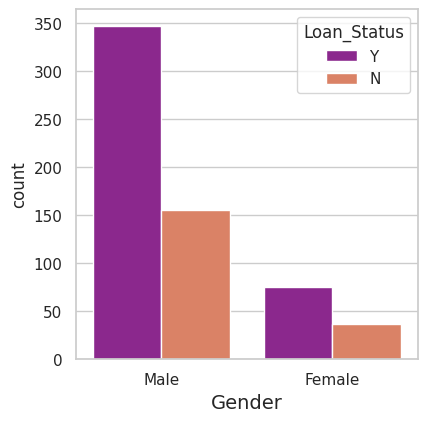

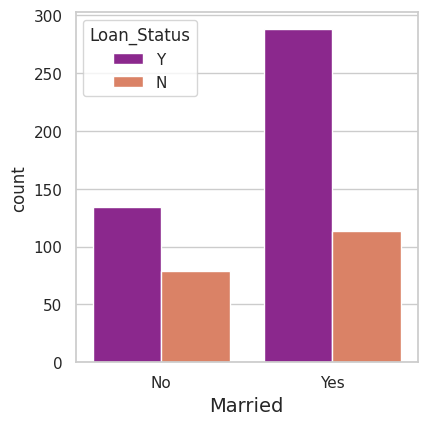

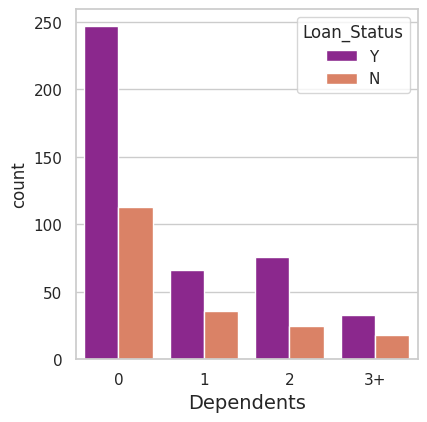

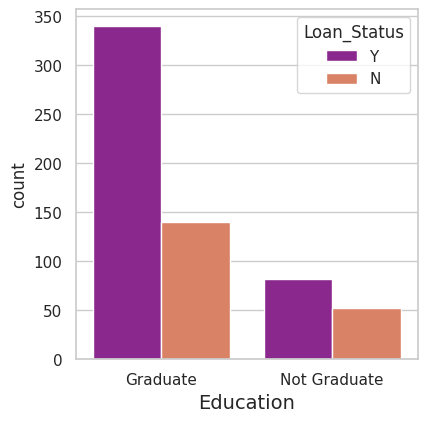

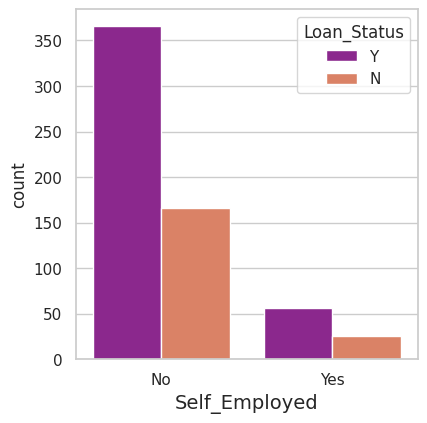

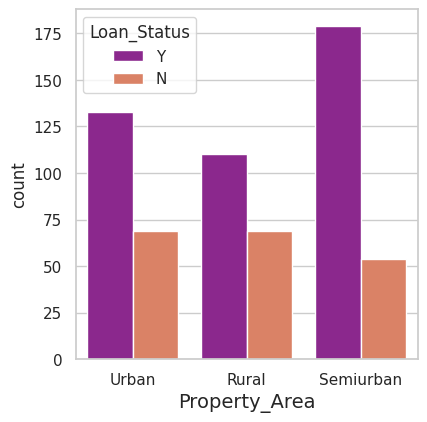

In [ ]:
for i in cat[:-1]:
    plt.figure(figsize=(15,10))
    plt.subplot(2,3,1)
    sns.countplot(x=i ,hue='Loan_Status', data=tr_df
,palette='plasma')
    plt.xlabel(i, fontsize=14)

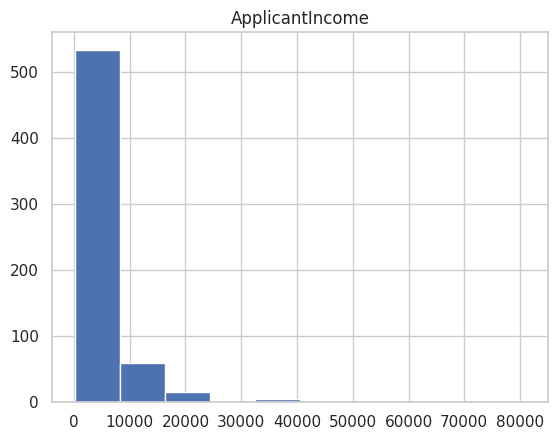

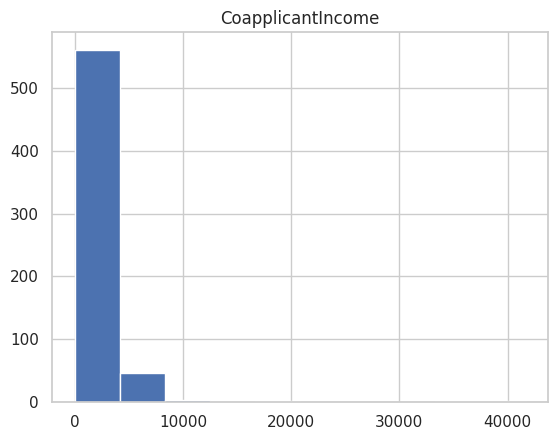

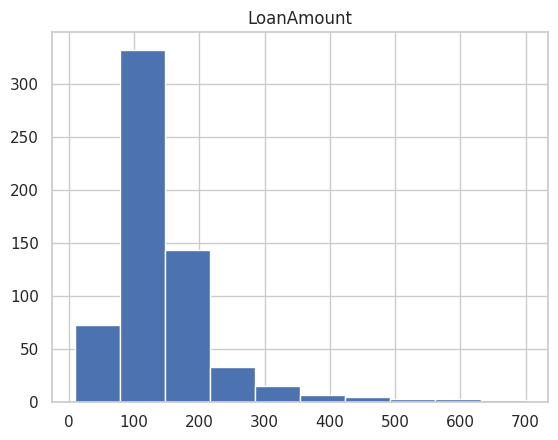

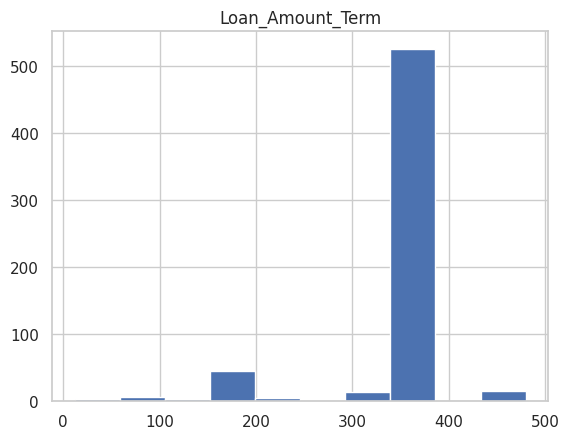

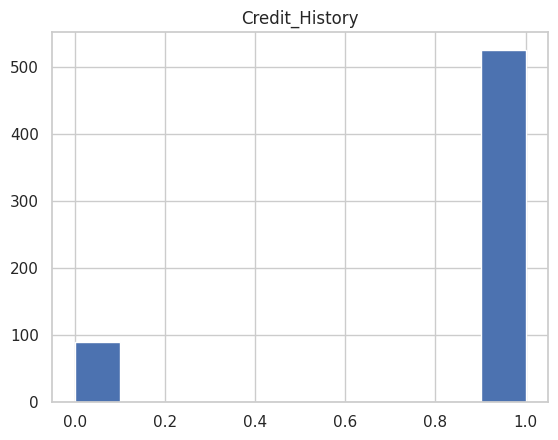

In [ ]:
for i in loan_num:
    plt.hist(loan_num[i])
    plt.title(i)
    plt.show()

In [ ]:
# Converting categorical values to numeric
to_numeric = {
    'Male': 1, 'Female': 2,
    'Yes': 1, 'No': 2,
    'Graduate': 1, 'Not Graduate': 2,
    'Urban': 3, 'Semiurban': 2, 'Rural': 1,
    'Y': 1, 'N': 0,
    '3+': 3
}

# Applying the mapping to both datasets
tr_df = tr_df.applymap(lambda label: to_numeric.get(label) if label in to_numeric else label)
te_df = te_df.applymap(lambda label: to_numeric.get(label) if label in to_numeric else label)

# Converting the 'Dependents' column to numeric
Dependents_ = pd.to_numeric(tr_df['Dependents'])
Dependents__ = pd.to_numeric(te_df['Dependents'])

# Dropping the original 'Dependents' column
tr_df.drop(['Dependents'], axis=1, inplace=True)
te_df.drop(['Dependents'], axis=1, inplace=True)

# Concatenating the new numeric 'Dependents' column
tr_df = pd.concat([tr_df, Dependents_], axis=1)
te_df = pd.concat([te_df, Dependents__], axis=1)

# Checking the manipulated datasets
print(f"Training set (row, col): {tr_df.shape}\nTesting set (row, col): {te_df.shape}\n")
print(tr_df.info(), "\n\n", te_df.info())


Training set (row, col): (614, 12)
Testing set (row, col): (367, 11)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Education          614 non-null    int64  
 3   Self_Employed      614 non-null    int64  
 4   ApplicantIncome    614 non-null    int64  
 5   CoapplicantIncome  614 non-null    float64
 6   LoanAmount         614 non-null    float64
 7   Loan_Amount_Term   614 non-null    float64
 8   Credit_History     614 non-null    float64
 9   Property_Area      614 non-null    int64  
 10  Loan_Status        614 non-null    int64  
 11  Dependents         614 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 57.7 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 11 columns

<ipython-input-23-f2f843f9e06a>:12: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  tr_df = tr_df.applymap(lambda label: to_numeric.get(label) if label in to_numeric else label)
<ipython-input-23-f2f843f9e06a>:13: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  te_df = te_df.applymap(lambda label: to_numeric.get(label) if label in to_numeric else label)


In [ ]:
# Memisahkan fitur (X) dan target (y)
y = tr_df['Loan_Status']
X = tr_df.drop('Loan_Status', axis=1)

# Membagi dataset menjadi training dan testing set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0
)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Inisialisasi dan pelatihan model
LR = LogisticRegression()
LR.fit(X_train, y_train)

# Melakukan prediksi
y_predict = LR.predict(X_test)

# Menampilkan classification report
print("Classification Report:\n")
print(classification_report(y_test, y_predict))

# Menghitung dan menampilkan skor akurasi
LR_SC = accuracy_score(y_test, y_predict)
print(f"\nAccuracy is: {LR_SC:.4f}")


Classification Report:

              precision    recall  f1-score   support

           0       0.92      0.43      0.59        51
           1       0.82      0.99      0.89       134

    accuracy                           0.83       185
   macro avg       0.87      0.71      0.74       185
weighted avg       0.85      0.83      0.81       185


Accuracy is: 0.8324


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


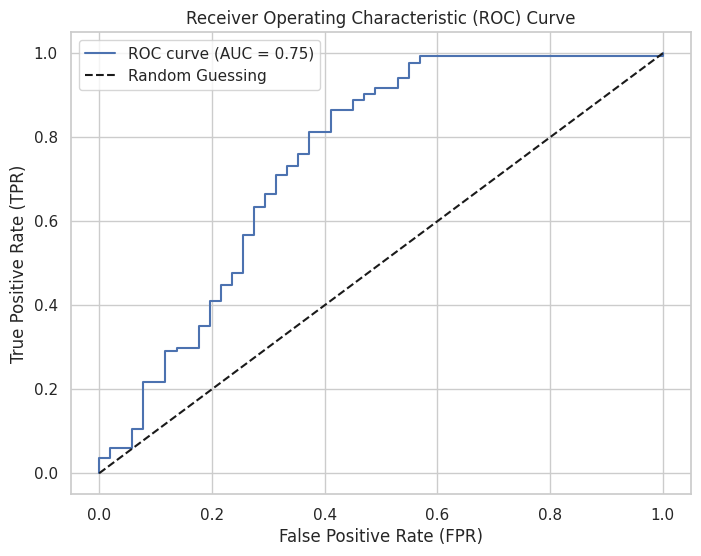

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get predicted probabilities for the positive class (Loan_Status = 1)
y_pred_proba = LR.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate AUC score
auc = roc_auc_score(y_test, y_pred_proba)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')  # Diagonal random line
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid(True)
plt.show()


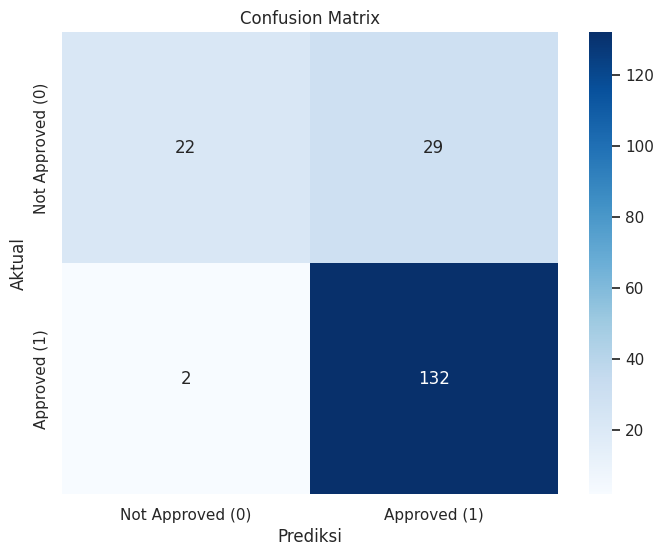

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Membuat confusion matrix
cm = confusion_matrix(y_test, y_predict)

# Visualisasi confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(
    cm, annot=True, fmt='d', cmap='Blues',
    xticklabels=['Not Approved (0)', 'Approved (1)'],
    yticklabels=['Not Approved (0)', 'Approved (1)']
)
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
import joblib
# Save the trained model
joblib.dump(LR, 'logistic_regression_model.pkl')
print("Model saved as logistic_regression_model.pkl")

Model saved as logistic_regression_model.pkl


In [ ]:
dummy_data = {
    'Gender': [1, 2, 1],
    'Married': [1, 2, 1],
    'Dependents': [1, 0, 2],
    'Education': [1, 2, 1],
    'Self_Employed': [2, 1, 2],
    'ApplicantIncome': [5000, 3000, 6000],
    'CoapplicantIncome': [1000, 0, 2000],
    'LoanAmount': [120.0, 80.0, 150.0],
    'Loan_Amount_Term': [360.0, 180.0, 360.0],
    'Credit_History': [1.0, 1.0, 0.0],
    'Property_Area': [2, 1, 3]
}
dummy_df = pd.DataFrame(dummy_data)
# Pastikan kolom sesuai dengan yang digunakan saat training
dummy_df = dummy_df[X_train.columns]
dummy_predictions = LR.predict(dummy_df)
print("Prediksi untuk data dummy:")
print(dummy_predictions)
# Jika ingin melihat probabilitas
dummy_pred_proba = LR.predict_proba(dummy_df)[:, 1]
print("\nProbabilitas prediksi untuk data dummy:")
dummy_pred_proba


Prediksi untuk data dummy:
[1 1 0]

Probabilitas prediksi untuk data dummy:


array([0.8269146 , 0.70458479, 0.19251258])